In [59]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import scipy as sp
from scipy.misc import derivative

In [60]:
N1 = 1000
N2 = 2000
NUMERO_DE_PONTOS = 1000
A = 2e-4

pos = np.arange(0, 0.050, 0.050/NUMERO_DE_PONTOS)
lc = 0.30
f = -102.04e-5/(pos + 2e-3)**2
g0 = 2e-3
u0 = 4e-7*np.pi

VRMS = [30, 90]
R = [2, 2e3]

In [61]:
H = np.array([0,
              68,
              135,
              203,
              271,
              338,
              406,
              474,
              542,
              609,
              1100,
              1500,
              2500,
              4000,
              5000,
              9000,
              12000,
              20000,
              25000])

B = np.array([0,
              0.733,
              1.205,
              1.424,
              1.517,
              1.560,
              1.588,
              1.617,
              1.631,
              1.646,
              1.689,
              1.703,
              1.724,
              1.731,
              1.738,
              1.761,
              1.770,
              1.80,
              1.816])

H_linear = np.array([0, 68])
B_linear = np.array([0, 0.733])

func = interp1d(B, H, kind='cubic', fill_value='extrapolate')
func_linear = interp1d(B_linear, H_linear, kind='linear', fill_value='extrapolate')

B_pnts = np.arange(0, 1.82, 1.82/NUMERO_DE_PONTOS)

H_it = func(B_pnts)
H_linear = func_linear(B_pnts)



In [62]:
tensao = lambda x : VRMS[1]*np.sqrt(2)*np.cos(120*np.pi*x)

array_tempos = np.arange(0, 0.05, 0.05/NUMERO_DE_PONTOS)
array_tensao_tempo = tensao(array_tempos)
phi_tempo = np.zeros(array_tempos.shape[0])

for i in range(array_tempos.shape[0]):
    phi_tempo[i] = 1/N1 * sp.integrate.trapezoid(array_tensao_tempo[:i], array_tempos[:i])

V2 = N2*derivative(interp1d(array_tempos, phi_tempo, fill_value='extrapolate'), array_tempos, dx=array_tempos/NUMERO_DE_PONTOS)

/tmp/ipykernel_24139/4078739218.py:10: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  V2 = N2*derivative(interp1d(array_tempos, phi_tempo, fill_value='extrapolate'), array_tempos, dx=array_tempos/NUMERO_DE_PONTOS)


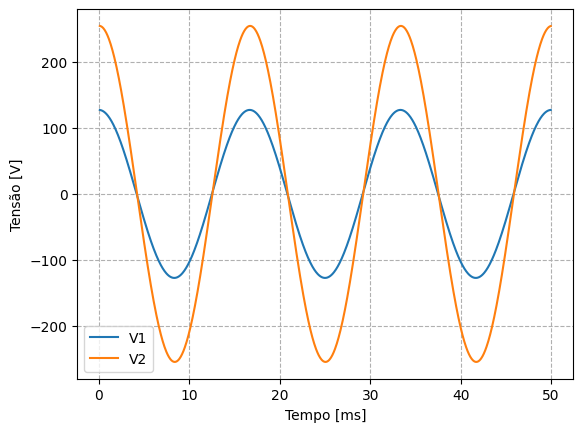

In [63]:
plt.ylabel('Tensão [V]')
plt.xlabel('Tempo [ms]')
plt.grid(linestyle='--')
plt.plot(array_tempos[2:]*1000, array_tensao_tempo[2:], label='V1')
plt.plot(array_tempos[2:]*1000, V2[2:], label='V2')
plt.legend()
plt.show()

In [64]:
B_tempo = phi_tempo/A
H_tempo = func(B_tempo)

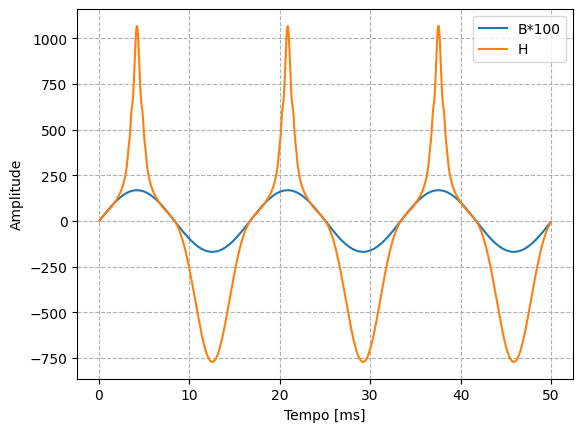

In [65]:
plt.ylabel('Amplitude')
plt.xlabel('Tempo [ms]')
plt.grid(linestyle='--')
plt.plot(array_tempos[2:]*1000, B_tempo[2:]*100, label='B*100')
plt.plot(array_tempos[2:]*1000, H_tempo[2:], label='H')
plt.legend()
plt.show()

In [66]:
I1 = (H_tempo*lc + N2*V2/(R[1]))/N1
I2 = V2/(R[1])

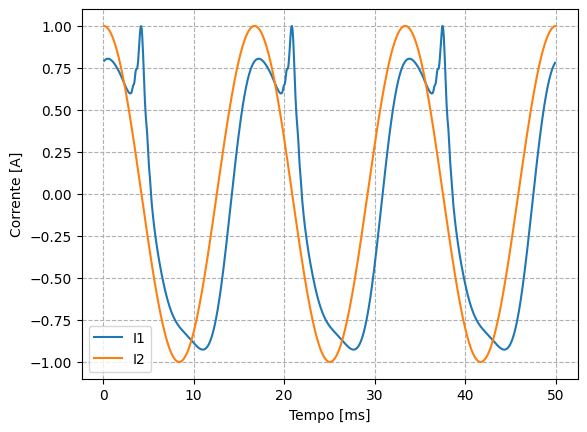

In [67]:
plt.ylabel('Corrente [A]')
plt.xlabel('Tempo [ms]')
plt.grid(linestyle='--')
plt.plot(array_tempos[2:]*1000, I1[2:]/np.max(I1[2:]), label='I1')
plt.plot(array_tempos[2:]*1000, I2[2:]/np.max(I2[2:]), label='I2')
plt.legend()
plt.show()